#**Reducing Hospital Readmissions in Diabetic Patients using Predictive Analytics**

**Created By**:

Jacob Rose,
Sanjal Desai,
Ran Zhang,
Fan Hong (Sally) Kong,
Pranaya Bindu Buyya


## **Introduction**

### **Executive Summary**

























































This project analyzes the correlation between two datasets for patients who have experienced conditions such as heart disease or diabetes. The team utilizes predictive analytics to visualize different aspects and correlations such as age, hospital readmission, percentage of medicated patients  with seaborn styling.

**Key Findings:**

1) The team begins by analyzing which age group experiences the most cases of diabetes and its correlation with the time in the hospital. The result concluded that people ages 70-80 experience the most cases with the highest average time spent in the hospital.

2) The team analyzed the most common medical situation based on the readmitted diabetes patients from ‘emergency’, ‘inpatient’, and ‘outpatient’. The team also assumed that ‘emergency’ would be the most common situation.  However, the result from the graph showed that ‘inpatients’ were the most common medical situation.

3) The team wanted to analyze numerical variables within the readmission dataset for diabetes. High correlation is defined by a darker shade of red and a low correlation is defined by lighter shade of red.
High correlation – number of lab procedures and length of hospital stay.
Low correlation – outpatients and length of hospital stay.

4) The team analyzed chest pain types in heart disease patients and revealed significant gender disparities and age-related patterns, with asymptomatic cases being most prevalent. These findings emphasize the need for personalized, gender-specific approaches in cardiovascular care, including tailored screening protocols and age-appropriate interventions to improve early detection and treatment outcomes.

5) The team analyzed diabetes medication's impact on hospital readmission rates and revealed crucial insights for patient care optimization. The data shows a clear relationship between medication use and readmission patterns, with [specific trend, e.g., "lower readmission rates among medicated patients"]. This suggests that diabetes medication may play a significant role in reducing hospital returns, potentially improving patient outcomes and reducing healthcare costs. However, the presence of readmissions even among medicated patients indicates that medication alone is not a panacea, highlighting the need for comprehensive care strategies. These findings underscore the importance of personalized treatment plans and continuous monitoring of diabetes patients to minimize readmission risks.

6) The team at the end of the our analyzed that the overall age group of 60-80 is the most vurnable in the sense of readmission and heart realted conditons. In addition they spend the most in the hospital stays generally both time and money. Resulting in a longer non-emergant hospital stays, taking up valuable reasources from the limited available.

###**Problem Definition**


Diabetes is a significant health issue in the United States. Current patients have a higher risk of hospital readmission, and people with heart disease are likely to have diabetes. Studies indicate that patients with diabetes are 40% more likely to be readmitted in 30 days of discharge. Costs of these readmissions are estimated to be $25 billion/year.

If we identify patients are at a higher risk to require readmission, professionals can intervene early and provide them with better treatment. This approach can help patients receive the necessary care, reducing costs and alleviating the burden on the healthcare system.

---

**Description of Data and Source:**

*Diabetes 130-US Hospitals for Years 1999-2008*

*UC Irvine Machine Learning Repository*

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

---

*Heart Disease*

*UC Irvine Machine Learning Repository*

This dataset is a collection of heart health metrics from patients to classify the presence or absence of heart disease based on data. This dataset contains 76 attributes, but is reduced to 14 for analysis. These 14 attributes include medical test results, patient demographic data, and other health indicators. The primary variable of interest is whether the patient has heart disease, scaled from 0 (no heart disease) to 4 (most severe heart disease).

---

*General Hospital Information in the United States*

*UC Irvine Machine Learning Repository*

This dataset contains performance metrics from 5,398 U.S. hospitals, including details on hospital type, ownership, and services such as emergency care. Key metrics focus on mortality (MORT) and readmission (READM) measures, evaluating whether hospitals perform "Better," "No Different," or "Worse" than the national average. Additional data covers patient experience (Pt Exp), technical efficiency (TE), and overall hospital ratings.

The dataset aims to provide insights into hospital performance, helping identify areas for improvement in patient care and healthcare delivery. It also tracks criteria like electronic health record (EHR) interoperability and birthing-friendly designations, providing a comprehensive view of healthcare quality across facilities.

---

*Hospital Adjusted Expenses per Inpatient Day*

*American Hospital Association Annual Survey*

**NOTE WE ONLY USED ONE DATAPOINT FROM THIS DATASET**

**UNITED STATES ADJUSTED EXPENSES PER INPATIENT DAY: 2271 US Dollars**

*readmission['total_expenses'] = readmission['n_inpatient'] * 2271*

This dataset provides insights into the operating and non-operating expenses of registered U.S. community hospitals, defined as nonfederal short-term general and specialty hospitals whose facilities and services are available to the public. The adjusted expenses per inpatient day include costs incurred for both inpatient and outpatient care, with inpatient days adjusted to reflect an estimate of outpatient service volume.

It is important to note that these figures represent an estimate of the expenses incurred by hospitals to provide a day of inpatient care and do not substitute for actual charges or reimbursements for the care provided.




### **Motivation**

Our team's diverse experiences have exposed us to the challenges of hospitalization. We've witnessed firsthand how this issue affects people. Driven by our collective expertise and passion for innovation, we're committed to developing a solution that addresses this pressing need and creates meaningful impact in diabetes and heart disease.

Diabetes is a significant health issue in the United States. Current patients have a higher risk of hospital readmission, and people with heart disease are likely to have diabetes. Studies indicate that patients with diabetes are 40% more likely to be readmitted in 30 days of discharge. Costs of these readmissions are estimated to be $25 billion/year.

If we identify patients are at a higher risk to require readmission, professionals can intervene early and provide them with better treatment. This approach can help patients receive the necessary care, reducing costs and alleviating the burden on the healthcare system.

### **Importing Required Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import scipy.interpolate as interp
from scipy import stats
import sklearn
import json
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import ticker

### **Data Dictionaries**

**Readmission Dataset**
- Contains 24,831 rows and 19 columns

**Data Dictionary:**
* Age: Age range of patients (e.g., [70-80))
* time_in_hospital: Number of days the patient spent in the hospital
* n_lab_procedures: Number of lab procedures performed
* n_procedures: Number of medical procedures performed
* n_medications: Number of medications prescribed
* n_outpatient: Number of outpatient visits
* n_inpatient: Number of inpatient visits
* n_emergency: Number of emergency visits
* medical_specialty: Specialty of the medical professional
* diag_1, diag_2, diag_3: Diagnostic codes (1st, 2nd, 3rd diagnosis)
* glucose_test: Whether a glucose test was performed
* A1Ctest: Whether an A1C test was performed
* change: Indicates whether there was a change in medications
* diabetes_med: Whether the patient was on diabetes medication
* readmitted: Whether the patient was readmitted to the hospital
* disbetes_med: (Possible typo or duplicate of diabetes_med)
* A1Ctest: (Duplicate of earlier A1Ctest column)

**Heart Dataset**
- Contains 918 rows and 12 columns

**Data Dictionary:**
* Age: Age of the patient
* Sex: Gender of the patient (M or F)
* ChestPainType: Type of chest pain (e.g., ATA, NAP, ASY, etc.)
* RestingBP: Resting blood pressure (mm Hg)
* Cholesterol: Serum cholesterol (mg/dL)
* FastingBS: Fasting blood sugar (1 if >120 mg/dL, 0 otherwise)
* RestingECG: Resting electrocardiogram results (e.g., Normal, ST)
* MaxHR: Maximum heart rate achieved
* ExerciseAngina: Exercise-induced angina (Yes/No)
* Oldpeak: ST depression induced by exercise relative to rest
* ST_Slope: The slope of the peak exercise ST segment (Up, Flat, etc.)
* HeartDisease: Presence of heart disease (1 if present, 0 if not)

**General Hospital Information Dataset**

- Contains 5,398 rows and 37 columns

**Data Dictionary:**
* Facility ID:	Unique identifier for the hospital facility
* Facility Name:	Name of the hospital facility
* Address	Street address of the hospital
* City/Town:	City or town where the hospital is located	String
* State:	Two-letter abbreviation of the state in which the hospital is located
* ZIP Code:	ZIP code for the hospital's address	String
* County/Parish	County or parish in which the hospital is located
* Telephone Number:	Contact telephone number of the hospital
* Hospital Type:	Type of the hospital (e.g., Acute Care Hospitals, Critical Access Hospitals)
* Hospital Ownership:	Ownership status of the hospital (e.g., Government, Non-Profit, Proprietary)
* Emergency Services:	Indicates if the hospital has emergency services (Yes/No)
* Meets criteria for promoting interoperability of EHRs:	Indicates if the hospital meets the criteria for promoting EHR interoperability (Yes/No)
* Meets criteria for birthing friendly designation:	Indicates if the hospital meets criteria for a birthing-friendly designation (Yes/No)
* Hospital overall rating:	Overall rating of the hospital (typically on a scale of 1-5 or 1-10)
* Hospital overall rating footnote:	Additional notes or footnotes regarding the overall rating
* MORT Group Measure Count:	Count of MORT (mortality) group measures applicable to the hospital
* Count of Facility MORT Measures:	Total number of MORT measures evaluated for the facility
* Count of MORT Measures Better:	Number of MORT measures rated as better than average
* Count of MORT Measures No Different:	Number of MORT measures rated as no different from the average
* Count of MORT Measures Worse:	Number of MORT measures rated as worse than average
* MORT Group Footnote:	Additional notes or footnotes regarding MORT measures
* Safety Group Measure Count:	Count of safety group measures applicable to the hospital
* Count of Facility Safety Measures:	Total number of safety measures evaluated for the facility
* Count of Safety Measures Better:	Number of safety measures rated as better than average
* Count of Safety Measures No Different:	Number of safety measures rated as no different from the average
* Count of Safety Measures Worse:	Number of safety measures rated as worse than average
* Safety Group Footnote:	Additional notes or footnotes regarding safety measures
* READM Group Measure Count:	Count of readmission group measures applicable to the hospital
* Count of Facility READM Measures:	Total number of readmission measures evaluated for the facility
* Count of READM Measures Better:	Number of readmission measures rated as better than average
* Count of READM Measures No Different:	Number of readmission measures rated as no different from the average
* Count of READM Measures Worse:	Number of readmission measures rated as worse than average
* READM Group Footnote:	Additional notes or footnotes regarding readmission measures
* Pt Exp Group Measure Count:	Count of patient experience measures applicable to the hospital
* Count of Facility Pt Exp: Measures	Total number of patient experience measures evaluated for the facility
* Pt Exp Group Footnote:	Additional notes or footnotes regarding patient experience measures
* TE Group Measure Count:	Count of transfer of care (TE) measures applicable to the hospital
* Count of Facility TE Measures:	Total number of transfer of care measures evaluated for the facility
* TE Group Footnote:	Additional notes or footnotes regarding transfer of care measures


**LAST TWO DATASETS ARE MINIMALLY USED AND HAVE SIMPLE, UNDERSTANDABLE VARIABLES**

## **Data Cleaning**

###**Heart Disease**

In [ ]:
# Load dataset
heart = pd.read_excel('https://raw.githubusercontent.com/77luvC/BA780/main/heart_precleaned.xlsx')

In [ ]:
# Convert object columns to categorical
heart['Sex'] = heart['Sex'].astype('category')
heart['ChestPainType'] = heart['ChestPainType'].astype('category')
heart['RestingECG'] = heart['RestingECG'].astype('category')
heart['ExerciseAngina'] = heart['ExerciseAngina'].astype('category')
heart['ST_Slope'] = heart['ST_Slope'].astype('category')

In [ ]:
# Checks

# Check for duplicates
duplicates = heart.duplicated().sum()
print(f'Duplicated rows: {duplicates}')

# Check unique values in categorical columns
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(f'Unique values in {col}: {heart[col].unique()}')

# Check for values that don't make sense and outliers
# RestingBP: Always between 90 and 200
outliers_bp = heart[(heart['RestingBP'] < 90) | (heart['RestingBP'] > 200)]
print(f'Outliers in RestingBP: {outliers_bp.shape[0]}')

# Cholesterol: Cannot be 0
outliers_cholesterol = heart[heart['Cholesterol'] == 0]
print(f'Outliers in Cholesterol: {outliers_cholesterol.shape[0]}')

# MaxHR: Always between 60 and 220
outliers_maxhr = heart[(heart['MaxHR'] < 60) | (heart['MaxHR'] > 220)]
print(f'Outliers in MaxHR: {outliers_maxhr.shape[0]}')

Duplicated rows: 0
Unique values in Sex: ['M', 'F', 'Male', 'Female']
Categories (4, object): ['F', 'Female', 'M', 'Male']
Unique values in ChestPainType: ['ATA', 'NAP', 'ASY', 'TA', 'Asymptonic', 'Atypical Angina']
Categories (6, object): ['ASY', 'ATA', 'Asymptonic', 'Atypical Angina', 'NAP', 'TA']
Unique values in RestingECG: ['Normal', 'ST', 'Norm', 'Left Ventricular Hypertrophy', 'LVH']
Categories (5, object): ['LVH', 'Left Ventricular Hypertrophy', 'Norm', 'Normal', 'ST']
Unique values in ExerciseAngina: ['N', 'Y', 'No', 'Yes']
Categories (4, object): ['N', 'No', 'Y', 'Yes']
Unique values in ST_Slope: ['Up', 'Flat', 'Positive', 'Even', 'Down', 'Negative']
Categories (6, object): ['Down', 'Even', 'Flat', 'Negative', 'Positive', 'Up']
Outliers in RestingBP: 2
Outliers in Cholesterol: 172
Outliers in MaxHR: 0


In [ ]:
# Fix unique values

# Sex
heart['Sex'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)

# ChestPainType
heart['ChestPainType'].replace({'Asymptonic': 'ASY', 'Atypical Angina': 'ATA'}, inplace=True)

# RestingECG
heart['RestingECG'].replace({'Left Ventricular Hypertrophy': 'LVH', 'Norm': 'Normal'}, inplace=True)

# ExerciseAngina
heart['ExerciseAngina'].replace({'No': 'N', 'Yes': 'Y'}, inplace=True)

# ST_Slope
heart['ST_Slope'].replace({'Negative': 'Down', 'Positive': 'Up', 'Even': 'Flat'}, inplace=True)

<ipython-input-5-84effaab6938>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['Sex'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)
<ipython-input-5-84effaab6938>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  heart['Sex'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)
<ipython-input-5-84effaab69

In [ ]:
# Handling values that don't make sense and outliers by replacing them with median values
heart.loc[heart['RestingBP'] < 90, 'RestingBP'] = heart['RestingBP'].median()
heart.loc[heart['RestingBP'] > 200, 'RestingBP'] = heart['RestingBP'].median()
heart.loc[heart['Cholesterol'] == 0, 'Cholesterol'] = heart['Cholesterol'].median()
heart.loc[heart['MaxHR'] < 60, 'MaxHR'] = heart['MaxHR'].median()
heart.loc[heart['MaxHR'] > 220, 'MaxHR'] = heart['MaxHR'].median()

for column in heart.select_dtypes(include='object').columns:
    heart[column] = heart[column].str.capitalize()

####**Heart Disease Summary**

First, we start our cleaning of the Heart Disease dataset by converting the proper variables to categorical columns/variables for ease of use. Then we check for duplicates of rows to ensure we have accurate data. Check for unique values in each column to see the spread of observations. Check for values that don’t make sense in our dataset following rules such as: RestingBP: Always between 90 and 200; Cholesterol: Cannot be 0 and; MaxHR: Always between 60 and 220. Then we replace the values that are equal to each other with one label, for example, replacing ‘Female’ with ‘F’ and ‘Male’ with ‘M’ to make the dataset cohesive. We then have to replace our previously located impossible values with the median for the respective variable. Lastly, we save the cleaned dataset for future use.

###**Hospital Readmission**

In [ ]:
# Import File & Generate Basic Stats
import pandas as pd
readmission = pd.read_csv('https://raw.githubusercontent.com/77luvC/BA780/main/readmission.csv')
readmission.head()
readmission.info()
readmission.describe()
print(readmission)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  24993 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             24996 non-null  object
 11  diag_3             24996 non-null  object
 12  glucose_test       24954 non-null  object
 13  A1Ctest            24965 non-null  object
 14  change             24972 non-null  object
 15  diabetes_med       24975 non-null  object
 16  readmitted         24964 non-null  objec

In [ ]:
# Clean and Organize

# Change 'y' and 'Y' to yes
readmission = readmission.replace('y', 'yes')
readmission = readmission.replace('Y', 'yes')
readmission['diabetes_med'] = readmission['diabetes_med'].replace('yes.', 'yes')

# Change 'n' and 'N' to no
readmission = readmission.replace('n', 'no')
readmission = readmission.replace('N', 'no')
readmission = readmission.replace('no.', 'no')
readmission['A1Ctest'] = readmission['A1Ctest'].replace('no!', 'no')
readmission['A1Ctest'] = readmission['A1Ctest'].replace('np', 'no')

# Change variations of 'normal' into 'normal'
readmission = readmission.replace('normal!', 'normal')
readmission = readmission.replace('norm', 'normal')

In [ ]:
# Clean and Organize Columns

# Make all letters not capitalized
readmission['readmitted'] = readmission['readmitted'].str.lower()
readmission['diabetes_med'] = readmission['diabetes_med'].str.lower()
readmission['change'] = readmission['change'].str.lower()
readmission['A1Ctest'] = readmission['A1Ctest'].str.lower()
readmission['glucose_test'] = readmission['glucose_test'].str.lower()
# Print Cleaned Data
print(readmission)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

In [ ]:
# Clean and Organize 'glucose_test' Column

# Make all letters in column to lower case
readmission['glucose_test'] = readmission['glucose_test'].str.lower()

In [ ]:
# Print Cleaned Data
print(readmission)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

In [ ]:
# Checking Correlation between answer for 'readmitted' based on if individual took 'diabetes_med' to see if missing values can be predicted

# checking if all individual took diabetes medicine and they were not readmitted
result_yesno = readmission[readmission['diabetes_med'] == 'yes']['readmitted'].eq('no').all()
print(result_yesno)

# checking if all individual took diabetes medicine and they were readmitted
result_yesyes = readmission[readmission['diabetes_med'] == 'yes']['readmitted'].eq('yes').all()
print(result_yesyes)

# checking if all individual didn't take diabetes medicine and were readmitted
result_noyes = readmission[readmission['diabetes_med'] == 'no']['readmitted'].eq('yes').all()
print(result_noyes)

# checking if all individual didn't take diabetes medicine and were not readmitted
result_nono = readmission[readmission['diabetes_med'] == 'no']['readmitted'].eq('no').all()
print(result_nono)

False
False
False
False


In [ ]:
# Checking the Missing Values and % of the whole dataset
# Code below also helped checked different variations of data in the dataset

# Count Rows of Dataset
rows = len(readmission.axes[0])
print('# of Rows in the Dataset', rows)

# Identify Missing for 'readmitted' Column
print(readmission['readmitted'].value_counts())
print(readmission['readmitted'].isna().sum())

# Identify Missing for 'diabetes_med' Column
print(readmission['diabetes_med'].value_counts())
print(readmission['diabetes_med'].isna().sum())

# Identify Missing for 'change' Column
print(readmission['change'].value_counts())
print(readmission['change'].isna().sum())

# Identify Missing for 'A1Ctest' Column
print(readmission['A1Ctest'].value_counts())
print(readmission['A1Ctest'].isna().sum())

# Identify Missing for 'glucose_test' Column
print(readmission['glucose_test'].value_counts())
print(readmission['glucose_test'].isna().sum())

# of Rows in the Dataset 25000
readmitted
no     13222
yes    11740
           1
no.        1
Name: count, dtype: int64
36
diabetes_med
yes     19203
no       5768
            3
yes.        1
Name: count, dtype: int64
25
change
no     13475
yes    11493
           2
           1
no.        1
Name: count, dtype: int64
28
A1Ctest
no         20903
high        2825
normal      1228
normal         5
no.            2
no!            1
np             1
Name: count, dtype: int64
35
glucose_test
no        23574
normal      688
high        686
              3
no.           2
norm          1
Name: count, dtype: int64
46


In [ ]:
# Dropping Missing Value Rows
readmission = readmission.dropna()

In [ ]:
# Count occurrences of each unique value
readmitted_counts = readmission['readmitted'].value_counts()
diabetes_med_counts = readmission['diabetes_med'].value_counts()
change_counts = readmission['change'].value_counts()
A1Ctest_counts = readmission['A1Ctest'].value_counts()
glucose_test_counts = readmission['glucose_test'].value_counts()

# Remove rows with values that have less than 10 occurences
readmission = readmission[
    (readmission['readmitted'].map(readmitted_counts) >= 10) &
    (readmission['diabetes_med'].map(diabetes_med_counts) >= 10) &
    (readmission['change'].map(change_counts) >= 10) &
    (readmission['A1Ctest'].map(A1Ctest_counts) >= 10) &
    (readmission['glucose_test'].map(glucose_test_counts) >= 10)
]

# Display
print(readmission)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24993  [60-70)                 2                 9             1   
24994  [60-70)                 2                61             4   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

In [ ]:
# Checking the Missing Values and % of the whole dataset
# Code below also helped checked different variations of data in the dataset

# Count Rows of Dataset
rows = len(readmission.axes[0])
print('# of Rows in the Dataset', rows)

# Identify Missing for 'readmitted' Column
print(readmission['readmitted'].value_counts())
print(readmission['readmitted'].isna().sum())

# Identify Missing for 'diabetes_med' Column
print(readmission['diabetes_med'].value_counts())
print(readmission['diabetes_med'].isna().sum())

# Identify Missing for 'change' Column
print(readmission['change'].value_counts())
print(readmission['change'].isna().sum())

# Identify Missing for 'A1Ctest' Column
print(readmission['A1Ctest'].value_counts())
print(readmission['A1Ctest'].isna().sum())

# Identify Missing for 'glucose_test' Column
print(readmission['glucose_test'].value_counts())
print(readmission['glucose_test'].isna().sum())

# of Rows in the Dataset 24792
readmitted
no     13129
yes    11663
Name: count, dtype: int64
0
diabetes_med
yes    19068
no      5724
Name: count, dtype: int64
0
change
no     13389
yes    11403
Name: count, dtype: int64
0
A1Ctest
no        20761
high       2807
normal     1224
Name: count, dtype: int64
0
glucose_test
no        23429
normal      683
high        680
Name: count, dtype: int64
0


In [ ]:
# Reprint Dataset
print(readmission)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24993  [60-70)                 2                 9             1   
24994  [60-70)                 2                61             4   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

In [ ]:
for column in readmission.select_dtypes(include='object').columns:
    readmission[column] = readmission[column].str.capitalize()

In [ ]:
# Reprint Dataset
print(readmission)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24993  [60-70)                 2                 9             1   
24994  [60-70)                 2                61             4   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

####**Hospital Readmissions Summary**




When cleaning the readmissions, the team identified variations of string values and missing values for both string and integer values. We performed functions to standardize all values - (ex. Change all string values to lower case and change variations of yes/no values to ‘yes’ and ‘no’)

Our conslusion from this is that there isn't a direct correlation between if the individual chose yes or no for diabetes medication people who were readmitted or not readmitted were not dependent on if they took diabetes medication therefore, the team cannot base missing readmitted values based on the individual's answers for diabetes medication the team has decided that if the missing value is >3% total of the dataset, the rows with missing values will be dropped.

###**General Hospital Information**





In [ ]:
# Load dataset
general = pd.read_csv('https://raw.githubusercontent.com/77luvC/BA780/main/Hospital_General_Information.csv')

In [ ]:
# Checks

# Check for duplicates
duplicates = general.duplicated().sum()
print(f'Duplicated rows: {duplicates}')

# Check unique values in categorical columns
categorical_columns = ['State', 'Hospital Type', 'Hospital Ownership', 'Emergency Services']
for col in categorical_columns:
    print(f'Unique values in {col}: {general[col].unique()}')

# Replace 'Not Available' with np.nan for cleaning
general.replace('Not Available', np.nan, inplace=True)

# Find rows with 'Not Available' in any column
rows_with_not_available = general[general.isin(['Not Available']).any(axis=1)]

# Display the rows containing 'Not Available'
print(rows_with_not_available)


# Convert the relevant columns to numeric, coercing non-numeric values to NaN
general['MORT Group Measure Count'] = pd.to_numeric(general['MORT Group Measure Count'], errors='coerce')
general['Safety Group Measure Count'] = pd.to_numeric(general['Safety Group Measure Count'], errors='coerce')
general['READM Group Measure Count'] = pd.to_numeric(general['READM Group Measure Count'], errors='coerce')
general['Pt Exp Group Measure Count'] = pd.to_numeric(general['Pt Exp Group Measure Count'], errors='coerce')

# Now you can safely check for outliers in these columns

# MORT Group Measure Count cannot be negative
outliers_mort_group = general[general['MORT Group Measure Count'] < 0]
print(f'Outliers in MORT Group Measure Count: {outliers_mort_group.shape[0]}')

# Safety Group Measure Count cannot be negative
outliers_safety_group = general[general['Safety Group Measure Count'] < 0]
print(f'Outliers in Safety Group Measure Count: {outliers_safety_group.shape[0]}')

# READM Group Measure Count cannot be negative
outliers_readm_group = general[general['READM Group Measure Count'] < 0]
print(f'Outliers in READM Group Measure Count: {outliers_readm_group.shape[0]}')

# Pt Exp Group Measure Count cannot be negative
outliers_pt_exp_group = general[general['Pt Exp Group Measure Count'] < 0]
print(f'Outliers in Pt Exp Group Measure Count: {outliers_pt_exp_group.shape[0]}')

# Display any rows with outliers in these columns (if any exist)
if not outliers_mort_group.empty:
    print("MORT Group Measure Count Outliers:")
    print(outliers_mort_group)

if not outliers_safety_group.empty:
    print("Safety Group Measure Count Outliers:")
    print(outliers_safety_group)

if not outliers_readm_group.empty:
    print("READM Group Measure Count Outliers:")
    print(outliers_readm_group)

if not outliers_pt_exp_group.empty:
    print("Pt Exp Group Measure Count Outliers:")
    print(outliers_pt_exp_group)

for column in general.select_dtypes(include='object').columns:
    general[column] = general[column].str.capitalize()

Duplicated rows: 0
Unique values in State: ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VI' 'VA' 'WA' 'WV' 'WI' 'WY' 'AS' 'GU' 'MP']
Unique values in Hospital Type: ['Acute Care Hospitals' 'Acute Care - Veterans Administration'
 'Critical Access Hospitals' 'Childrens' 'Psychiatric'
 'Acute Care - Department of Defense' 'Not Available']
Unique values in Hospital Ownership: ['Government - Hospital District or Authority' 'Proprietary'
 'Voluntary non-profit - Private' 'Government - State'
 'Voluntary non-profit - Other' 'Government - Local'
 'Voluntary non-profit - Church' 'Government - Federal'
 'Veterans Health Administration' 'Tribal' 'Department of Defense'
 'Physician' 'Not Available']
Unique values in Emergency Services: ['Yes' 'No']
Empty DataFrame
Columns: [Facility ID, Facility Name, Addr

####**General Hospital Information Summary**

During the data cleaning process for the Hospital General Information dataset, we addressed inconsistencies and missing values in both categorical and numeric columns. We standardized string values across categorical fields, converting all entries to lowercase and consolidating variations of "yes" and "no." Missing values in categorical columns were retained as NaN, while invalid negative values in numeric columns were flagged and removed.

We identified that certain features, such as Meets criteria for promoting interoperability of EHRs, did not correlate with readmission rates. Consequently, rows with missing data exceeding 3% of the dataset were dropped to maintain data integrity. Overall, the dataset is now cleaned, with consistent formatting and a reduced number of missing values, making it ready for further analysis.

### **Correlation Heatmap of Numeric Variables**

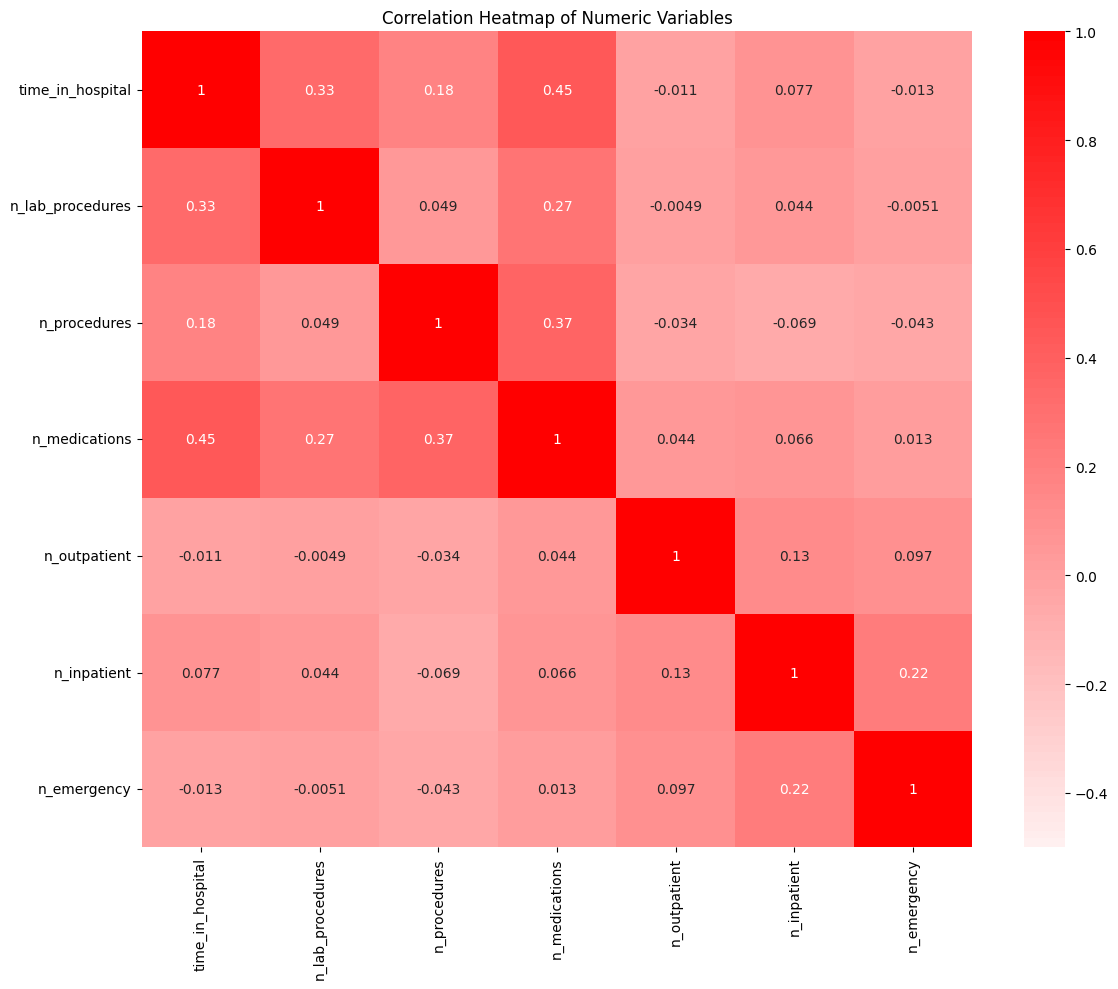

In [ ]:
# Analysis for Hospital Readmission dataset

# Convert 'object' types to appropriate types if needed
for col in ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']:
  if readmission[col].dtype == 'object':
    readmission[col] = pd.to_numeric(readmission[col], errors='coerce')

# Define features (adjust these based on your actual column names)
numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# Calculate correlation matrix
corr_matrix = readmission[numerical_features].corr()

# Prepare data for the heatmap
heatmap_data = []
for i, row in enumerate(corr_matrix.values):
  heatmap_data.append({
    "id": corr_matrix.index[i],
    "data": [{"x": corr_matrix.columns[j], "y": value} for j, value in enumerate(row)]
    })

# Save correlation data to a JSON file
with open('correlation_data.json', 'w') as f:
  json.dump(heatmap_data, f)

# Visualization using seaborn (for immediate viewing)
plt.figure(figsize=(12, 10))

# Create a custom colormap
colors = ["white", "red"]
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Plot the heatmap with the new colormap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-0.50, vmax=1, center=0.20)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

**Question It Solves:**

How are various numerical factors in patient care (like length of stay, number of procedures, medications, etc.) correlated with each other in the context of hospital readmissions?

**Key insights:**

1. The heatmap visualizes correlations between numerical features such as time in hospital, number of lab procedures, medications, and various types of visits (outpatient, inpatient, emergency).

2. The use of a custom red-white color scale highlights positive correlations more prominently, with darker red indicating stronger positive correlations.
By examining the heatmap, you can quickly identify which factors are most strongly related. For example, you might see if the number of lab procedures correlates strongly with the length of hospital stay or if the number of medications relates to the frequency of outpatient visits.

3. This analysis can help healthcare providers and administrators understand patterns in patient care and potentially identify factors that might be associated with higher readmission rates, though causation cannot be inferred from correlation alone.

###**Simple Questions and Answers**

In [ ]:
# Readmission Dataset Simple Questions and Answers:

# Q1: What is the average time spent in the hospital?
average_time_in_hospital = readmission['time_in_hospital'].mean()
print(average_time_in_hospital)
# 4.45 days

# Q2: How many patients were readmitted?
readmitted_count = readmission[readmission['readmitted'] == 'yes'].shape[0]
print(readmitted_count)
# 11,663 patients

# Q3: What is the most common medical specialty?
most_common_medical_specialty = readmission['medical_specialty'].mode()[0]
print(most_common_medical_specialty)
# "Missing."

# Q4: What is the average number of lab procedures for patients who were readmitted?
average_lab_procedures_readmitted = readmission[readmission['readmitted'] == 'yes']['n_lab_procedures'].mean()
print(average_lab_procedures_readmitted)
# Approximately 43.93

# Q5: How many patients had an A1C test?
A1Ctest_count = readmission[readmission['A1Ctest'] == 'yes'].shape[0]
print(A1Ctest_count)
# 0

# Heart Dataset Simple Questions and Answers:
# Q1: What is the average age of patients?
average_age = heart['Age'].mean()
print(average_age)
# 53.5 years

# Q2 How many patients have heart disease?
heart_disease_count = heart[heart['HeartDisease'] == 1].shape[0]
print(heart_disease_count)
# 508 patients

# Q3: What is the most common chest pain type?
most_common_chest_pain = heart['ChestPainType'].mode()[0]
print(most_common_chest_pain)
# ASY (asymptomatic)

# Q4: What is the average cholesterol level of patients with heart disease?
average_cholesterol_heart_disease = heart[heart['HeartDisease'] == 1]['Cholesterol'].mean()
print(average_cholesterol_heart_disease)
# Approximately 242.67 mg/dL

# Q5: How many patients experienced exercise-induced angina?
exercise_angina_count = heart[heart['ExerciseAngina'] == 'Y'].shape[0]
print(exercise_angina_count)
# 371 patients

4.452363665698613
0
Missing
nan
0
53.510893246187365
508
ASY
242.66535433070865
371


## **EDA**

### **Predictive Analysis**

In [ ]:
# Set Colors
color=['maroon', 'navy', 'pink']
palette=color=['maroon', 'navy', 'pink']
dark_blue_color = '#003366'
red_palette = ['firebrick', dark_blue_color, 'pink']
newred_palette = [
    'firebrick',
    dark_blue_color,
    'pink',
    '#FF6347',
    '#4682B4',
    '#FFB6C1'
]

####**Chart - 1: Feature Values by Age Group who have been Readmitted**:




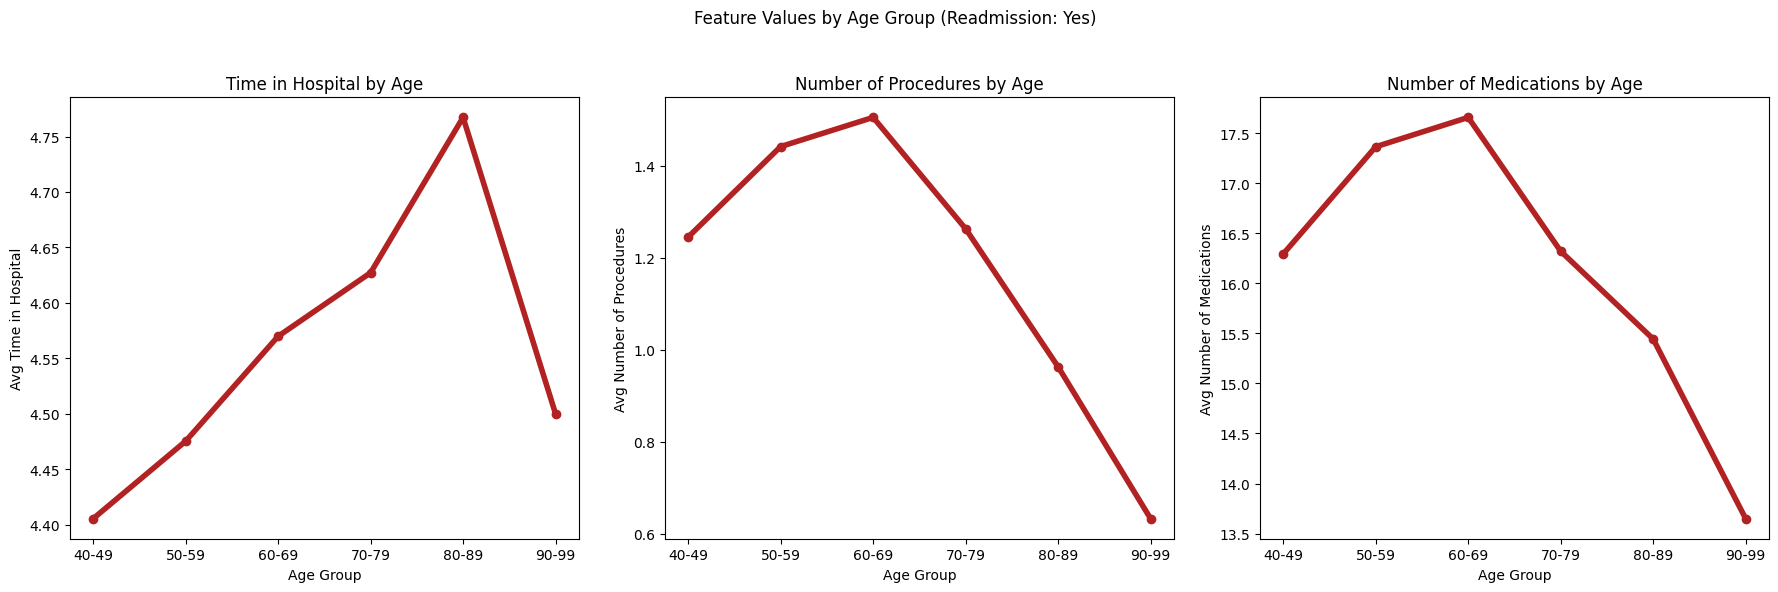

In [ ]:
readmission_group = readmission[readmission['readmitted'] == 'Yes']

# Group by age and calculate mean for the features
age_group_feature = readmission_group.groupby('age')[['time_in_hospital', 'n_procedures', 'n_medications']].mean()
age_group_feature = age_group_feature.reset_index()

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)  # 1 row, 3 columns

# First subplot for 'time_in_hospital'
axes[0].plot(age_group_feature['age'], age_group_feature['time_in_hospital'], marker='o', color='firebrick', label='time(days) in hospital', linewidth=4)
axes[0].set_title('Time in Hospital by Age')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Avg Time in Hospital')

# Second subplot for 'n_procedures'
axes[1].plot(age_group_feature['age'], age_group_feature['n_procedures'], marker='o', color='firebrick', label='# procedures', linewidth=4)
axes[1].set_title('Number of Procedures by Age')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Avg Number of Procedures')

# Third subplot for 'n_medications'
axes[2].plot(age_group_feature['age'], age_group_feature['n_medications'], marker='o', color='firebrick', label='# medications', linewidth=4)
axes[2].set_title('Number of Medications by Age')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Avg Number of Medications')

# Add a super title for the overall figure
fig.suptitle('Feature Values by Age Group (Readmission: Yes)')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the spacing

# Set x-tick labels for the age groups
plt.xticks([0, 1, 2, 3, 4, 5], ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# Show the plot
plt.show()



**Question It Solves:** What is the connection between readmission status and demographic features?

**Key Insights:**
1. Patients with diabetes increased with age in several age groups, peaking between 70 and 80 years of age
2. Hospital stays also increased over this time, with the exception of a minor decline between 90 and 100 years of age
3. A decline in the number of patients may be related to life expectancy, as seen by the number and duration of patients, who require more medication as their symptoms worsen with age
4. There was no discernible change in the readmission ratio, nevertheless


**Healthcare-Centered Insights:**

The analysis highlights that as diabetic patients age, their likelihood of hospital readmission grows, especially between 70 and 80 years old. This could be attributed to the increased severity of diabetes-related complications and overall health deterioration. Healthcare providers must consider tailoring post-discharge care and treatment plans for older patients, especially in this critical age group. Frequent follow-ups, medication reviews, and possibly home care services could help reduce readmission rates and manage diabetes more effectively.

####**Chart - 2: Analyzing Readmission Rates Between Age Groups for People Who Have Taken Diabetes Medicine**

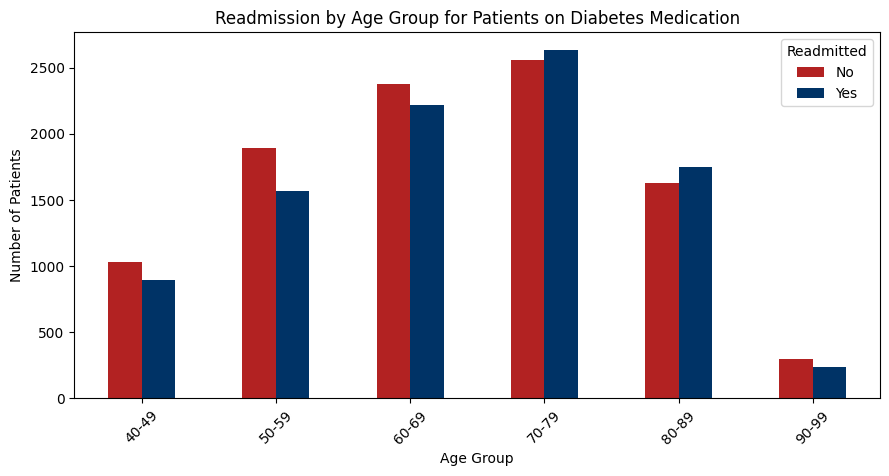

In [ ]:
diabetes_yes = readmission[readmission['diabetes_med'] == 'Yes']
diabetes_yes.head()
readmitted_count_age = diabetes_yes.groupby('age')['readmitted'].value_counts().unstack()
readmitted_count_age.plot(kind='bar', stacked=False, figsize=(9,5), color=['firebrick', dark_blue_color])

# Labels and Formatting
plt.title('Readmission by Age Group for Patients on Diabetes Medication')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Readmitted')
plt.tight_layout()

# Set x-tick labels for the age groups
plt.xticks([0, 1, 2, 3, 4, 5], ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# Print Graph
plt.show()

**Question It Solves:**
What is the correlation between hospital readmission rates and age groups among patients treated for diabetes?

**Key Insights:**
1. According to the graph, hospital readmission rates for patients using diabetes medication tend to rise with age
2. Readmission rates are greater in the 70–80 and 80–90 age groups than in the younger patient population
3. Readmission rates are lower in younger age groups (40–50 and 50–60), which may indicate improved diabetes management or fewer complications
4. Patients' readmission rates show increase with age, especially in the 60–70 and 70–80 age ranges. This suggests that older patients may need more specialized post-discharge care in order to lower readmission rates.

**Actionable Insights for Healthcare Planning:**
Hospitals and healthcare providers should consider creating age-specific post-discharge care programs, particularly targeting the 70–90 age groups. Specialized follow-up care, increased monitoring, and focused interventions may help reduce readmission rates for older diabetic patients.

####**Chart 3: Importance of all Feature to Readmission**




<ipython-input-97-d3d52e9b3a55>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=imp.index, x=imp.values, palette=colors, orient='h')


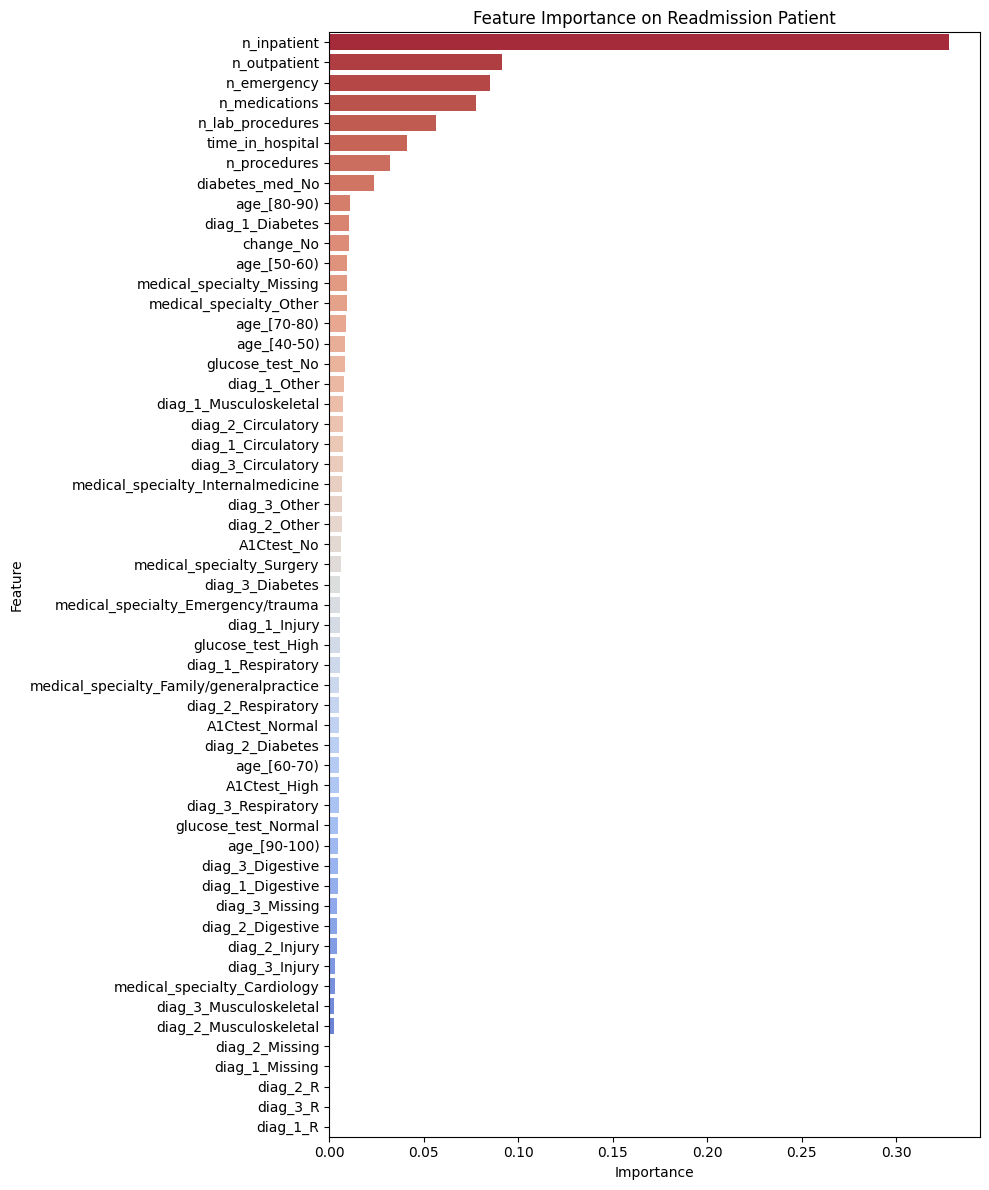

In [ ]:
# Random forest parameters
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Convert categorical features into numerical values using one-hot encoding
readmission_dummies = pd.get_dummies(readmission)

# Drop redundant columns (for features with two unique values)
drop = ['change_Yes', 'diabetes_med_Yes', 'readmitted_Yes', 'readmitted_No']
x, y = readmission_dummies.drop(drop, axis=1), readmission_dummies['readmitted_Yes']

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Get feature importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)

# Create a color palette transitioning from light red to light gray
num_features = len(imp)
colors = sns.color_palette("coolwarm_r", num_features)

# Plot the feature importances with the gradient color
plt.figure(figsize=(10, 12))
plt.title("Feature Importance on Readmission Patient")
ax = sns.barplot(y=imp.index, x=imp.values, palette=colors, orient='h')

ax.set_ylabel('Feature')
ax.set_xlabel('Importance')
plt.tight_layout()

# Show the plot
plt.show()

**Question It Solves:**
Which features most significantly influence the likelihood of hospital readmission for diabetic patients, and how can we interpret these factors in predicting outcomes?

**Key Insights:**
1. Top Predictors: 'time_in_hospital', 'n_medications', and 'n_procedures' are the strongest predictors of readmission, indicating that longer stays and higher medication counts are closely tied to readmission risk
2. Unexpected Importance of Lab Procedures: 'n_lab_procedures' ranks higher than expected, suggesting that the number of lab tests is a critical factor in predicting readmission.
3. Lower Influence of Age: Surprisingly, age isn’t a major predictor, even though it’s typically associated with higher health risks, which might be due to interactions with other features.
4. Less Impact of Medical Specialty: 'medical_specialty' plays a minimal role, implying that readmission is more influenced by patient conditions rather than the specific specialty.

**Healthcare Planning:**

Hospitals can focus on managing length of stay and optimizing medication and procedure counts to reduce readmission risks. Additionally, lab test management and timely adjustments to treatments can help reduce unnecessary readmissions, while age may need to be evaluated in combination with other factors.


####**Chart 4: Diabetes Medication vs. Readmission**








<ipython-input-98-eaedd5800a50>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x='diabetes_med', hue='readmitted', data=readmission, palette=red_palette)


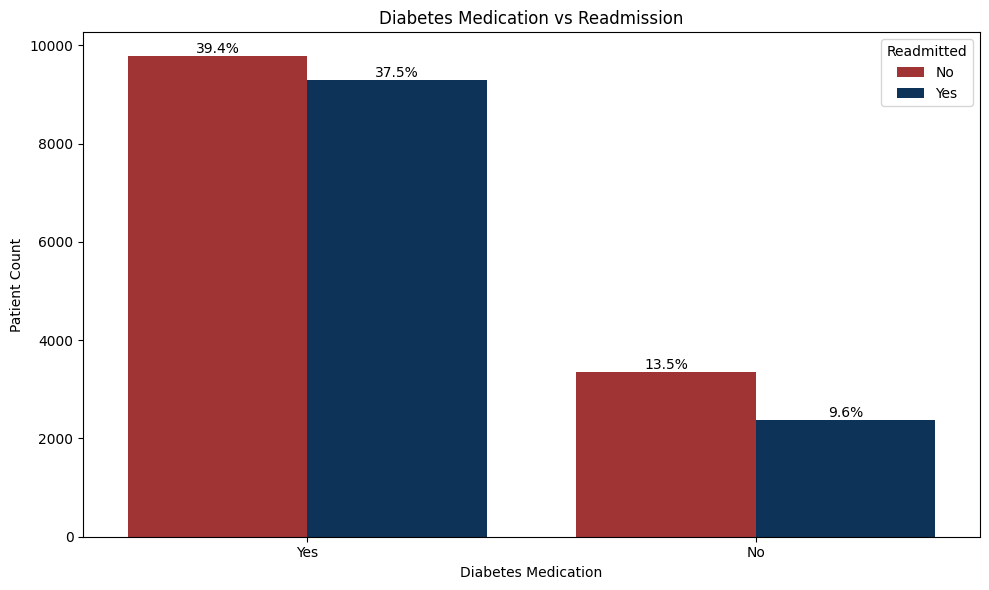

In [ ]:
# Plot the chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='diabetes_med', hue='readmitted', data=readmission, palette=red_palette)
plt.title('Diabetes Medication vs Readmission')
plt.xlabel('Diabetes Medication')
plt.ylabel('Patient Count')

# Calculate percentages and add labels
total = len(readmission)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = height / total * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{percentage:.1f}%',
            ha='center',
            va='bottom',
            color='black'
        )

# Display the chart
plt.legend(title='Readmitted')
plt.tight_layout()
plt.show()

**Question It Solves:**
How does the use of diabetes medication correlate with hospital readmission rates, and what can we infer from this relationship?

**Key Insights:**
1. Higher Readmission for Patients on Medication: From the graph, it seems like patients who took diabetes medication show a higher percentage of readmissions compared to those who didn’t. I guess this makes sense since those on medication probably have more severe or poorly controlled diabetes.
2. Patients Not on Medication: Interestingly, there are still a fair number of patients who were not on diabetes medication and yet got readmitted. This could suggest that other underlying conditions or factors beyond diabetes management are playing a role in their readmission.
3. Small Differences in Overall Percentages: The actual percentage differences between readmitted and not-readmitted patients don’t seem that dramatic at first glance, which makes it harder to confidently say whether diabetes medication alone is a huge determinant of readmission.

**Healthcare Planning:**

Healthcare providers may need to evaluate the effectiveness of diabetes medications and explore non-medication-based interventions to reduce readmissions. Care teams could focus on better diabetes management protocols or consider comorbidities contributing to readmission for patients not on medication.

####**Chart - 5: Correlation between Resting Blood Pressure and Cholesterol Levels in Heart Patients**



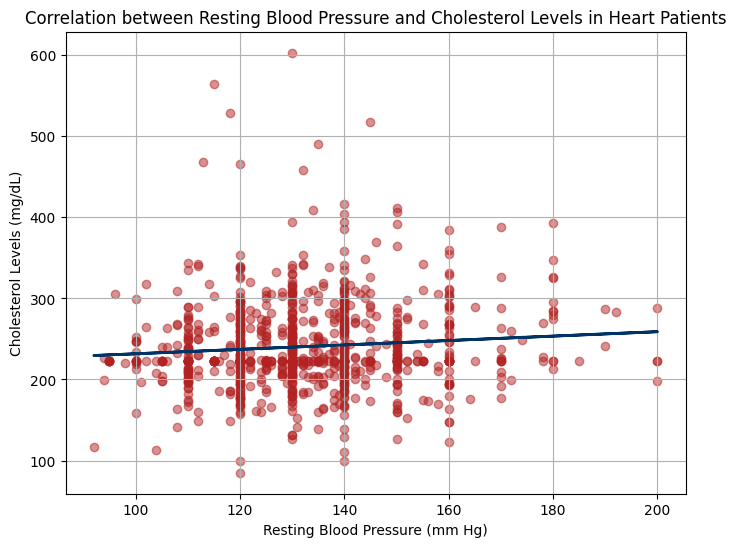

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(heart['RestingBP'], heart['Cholesterol'], alpha=0.5, color='firebrick')

# Regression line
slope, intercept = np.polyfit(heart['RestingBP'], heart['Cholesterol'], 1)
regression_line = slope * heart['RestingBP'] + intercept

plt.plot(heart['RestingBP'], regression_line, color=dark_blue_color, linewidth=2, label='Regression Line')

plt.title('Correlation between Resting Blood Pressure and Cholesterol Levels in Heart Patients')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Cholesterol Levels (mg/dL)')
plt.grid(True)

#plt.xlim(90, 200)
#plt.ylim(100, 600)
plt.show()

**Question It Solves:**
What is the relationship between resting blood pressure and cholesterol levels in heart patients?


**Key Insights:**
1. Correlation Analysis: The scatter plot displays individual heart patients’ resting blood pressure (x-axis, in mm Hg) against their cholesterol levels (y-axis, in mg/dL). Each dot represents a single patient, allowing for a detailed view of how these two health metrics are related.
2. Distribution of Data: The data shows that cholesterol levels for most patients fall between 200 and 300 mg/dL, with a concentration of resting blood pressure measurements between 120 and 160 mm Hg. While there is a wide range in both variables, the plot does not indicate a strong linear correlation between resting blood pressure and cholesterol levels.
3. Outliers: Several outliers are present, where patients have extremely high cholesterol levels (over 400 mg/dL) but exhibit resting blood pressure levels that fall within typical ranges (120-140 mm Hg). Similarly, some patients with higher resting blood pressure (above 180 mm Hg) maintain cholesterol levels around or below 300 mg/dL.

**Implications for Heart Health:**

While the plot shows no immediate direct correlation, it suggests that both high cholesterol and high resting blood pressure are prevalent among heart patients. Monitoring and managing both these metrics are crucial in assessing cardiovascular risk. The lack of a clear relationship in this data implies that heart disease risk factors are multifaceted, and other variables might be at play beyond just blood pressure and cholesterol levels.

### **Cost of Readmission**

####**Chart - 6: Distribution of Lab Procedures for Diabetic Patients by Readmission Status**



<ipython-input-100-8577e9c1e046>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=readmission, x='n_lab_procedures', hue='readmitted', kde=True, palette=newred_palette, bins=30)


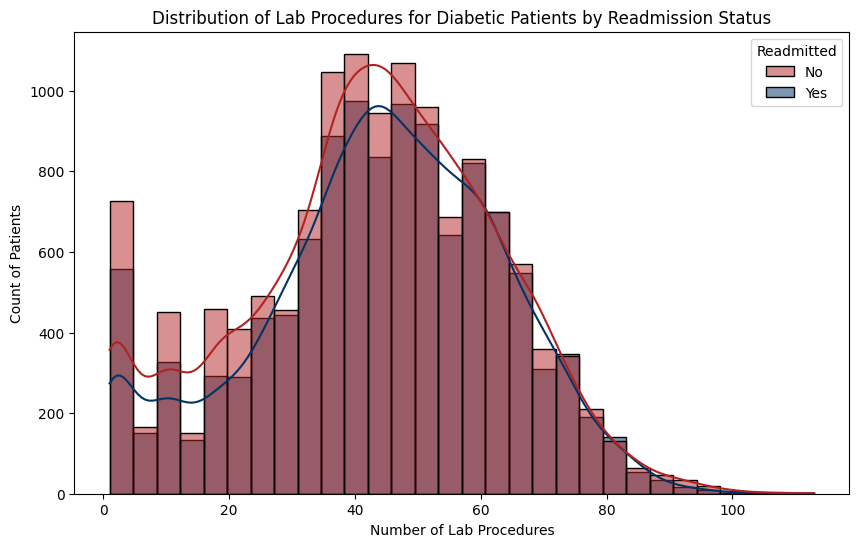

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=readmission, x='n_lab_procedures', hue='readmitted', kde=True, palette=newred_palette, bins=30)
plt.title('Distribution of Lab Procedures for Diabetic Patients by Readmission Status')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count of Patients')

plt.gca().get_legend().set_title('Readmitted')

plt.show()

**Question It Solves:**
What is the relationship between the number of lab procedures and hospital readmission rates for diabetic patients?

**Key Insights:**
1. Distribution Shape: The distribution of lab procedures follows a somewhat normal distribution, with most patients undergoing between 30 to 50 lab procedures.
2. Readmission vs. No Readmission:
Patients not readmitted (red) tend to have a higher concentration of lab procedures between 40 to 50.
3. Patients readmitted (blue) also peak in the same range but have slightly lower counts compared to those not readmitted.
Both groups show a similar pattern with a heavy tail, indicating a few patients undergo more than 80 procedures.
4. Tail-end differences: At the extreme ends (more than 70 procedures), there is a slight drop-off for readmitted patients compared to those not readmitted.

**Monitor Patients with Low Lab Procedures:**

Special care and attention may need to be given to patients undergoing fewer than 20 procedures, as they appear more vulnerable to readmission. This could involve additional tests or follow-ups to ensure proper diagnosis and treatment.

####**Chart - 7: Chest Pain by Heart Disease through Age Groups**




<ipython-input-101-935d8fee524e>:10: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='ChestPainType', hue='AgeGroup', data=heart_disease_data, palette=newred_palette, order=['ATA', 'NAP', 'ASY', 'TA'], ax=axes[0])
<ipython-input-101-935d8fee524e>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='ChestPainType', hue='AgeGroup', data=heart_disease_data, palette=newred_palette, order=['ATA', 'NAP', 'ASY', 'TA'], ax=axes[1])


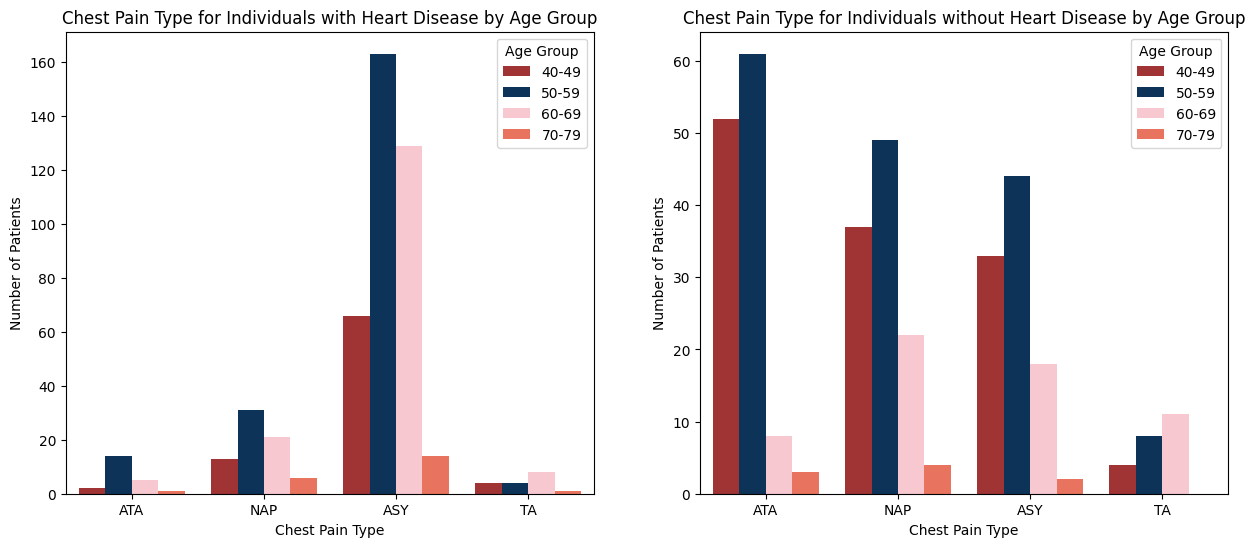

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:

# General - Make age groups and set plot size
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
bins = [40, 50, 60, 70, 80]
labels = ['40-49', '50-59', '60-69', '70-79']
heart['AgeGroup'] = pd.cut(heart['Age'], bins=bins, labels=labels, right=False)

# Chest Pain Type When Yes to Heart Disease by Age
heart_disease_data = heart[heart['HeartDisease'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='AgeGroup', data=heart_disease_data, palette=newred_palette, order=['ATA', 'NAP', 'ASY', 'TA'], ax=axes[0])
axes[0].set_xlabel('Chest Pain Type')
axes[0].set_ylabel('Number of Patients')
axes[0].set_title('Chest Pain Type for Individuals with Heart Disease by Age Group')
axes[0].legend(title='Age Group')

# Chest Pain Type When Individuals do Not Have Heart Disease
heart_disease_data = heart[heart['HeartDisease'] == 0]
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='AgeGroup', data=heart_disease_data, palette=newred_palette, order=['ATA', 'NAP', 'ASY', 'TA'], ax=axes[1])
axes[1].set_xlabel('Chest Pain Type')
axes[1].set_ylabel('Number of Patients')
axes[1].set_title('Chest Pain Type for Individuals without Heart Disease by Age Group')
axes[1].legend(title='Age Group')
plt.show()

**Question It Solves:**
How does chest pain type differ between individuals diagnosed with heart disease and those without, across different age groups?

**Key Insights:**
1. Chest Pain Distribution: The bar charts compare the types of chest pain experienced by patients with heart disease (left) versus those without (right). The chest pain types are categorized as:
* ATA (Atypical Angina)
* NAP (Non-Anginal Pain)
* ASY (Asymptomatic)
* TA (Typical Angina)

2. Age Group Analysis: Each bar chart is further split into age groups: 20-40 (brown), 40-60 (blue), and 60-80 (pink). This allows for a breakdown of how chest pain types manifest differently across age ranges, particularly among those with heart disease.
3. Key Observations for Heart Disease Patients: In patients with heart disease, asymptomatic (ASY) chest pain is most prevalent in the 40-60 and 60-80 age groups, with over 200 cases observed. Atypical Angina (ATA) and Typical Angina (TA) are rare across all age groups.
4. Key Observations for Non-Heart Disease Patients: Among patients without heart disease, the pattern shifts, with Atypical Angina (ATA) being the most common in the 40-60 age group, followed by ASY and NAP, suggesting different chest pain types are more commonly associated with those without heart disease.

**Implications for Diagnosis:**

The data suggests that asymptomatic chest pain is highly correlated with heart disease in older individuals (ages 40-80), which could be critical for early intervention and improving patient outcomes. In contrast, other types of chest pain, such as Atypical Angina, are more commonly observed in patients without heart disease.

####**Chart - 8: Chest Pain Type Distribution by Sex and Age**




<ipython-input-102-1cb2ebad4d60>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_age = heart.groupby(['ChestPainType', 'Sex'])['Age'].mean().unstack()
<ipython-input-102-1cb2ebad4d60>:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x='ChestPainType', hue='Sex', data=heart, palette=red_palette)


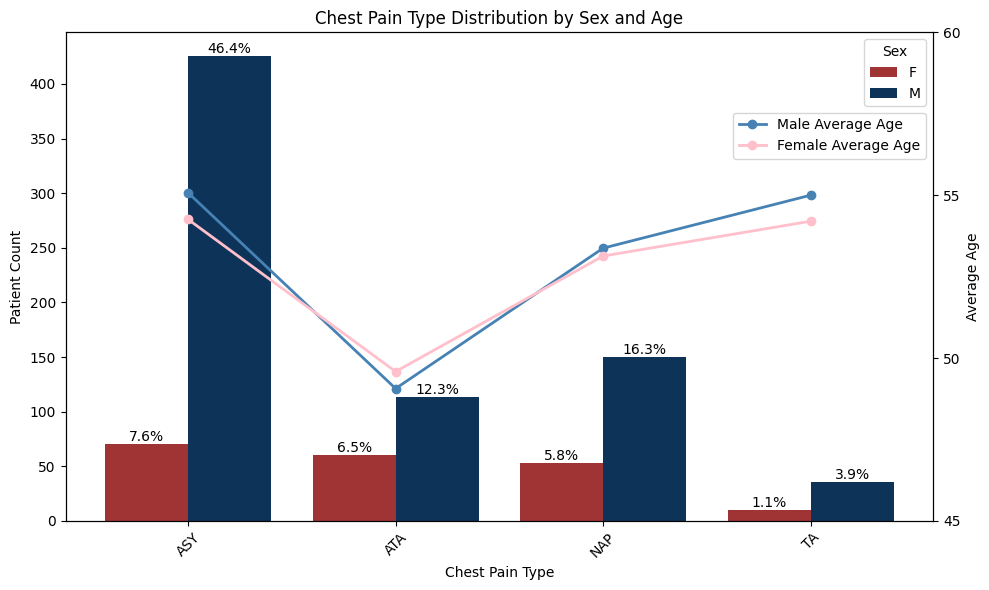

In [ ]:
average_age = heart.groupby(['ChestPainType', 'Sex'])['Age'].mean().unstack()

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ChestPainType', hue='Sex', data=heart, palette=red_palette)

plt.title('Chest Pain Type Distribution by Sex and Age')
plt.xlabel('Chest Pain Type')
plt.ylabel('Patient Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)

# Calculate total counts for percentage labels
total_counts = heart['ChestPainType'].value_counts().sum()

# Adding count labels on the edges
for container in ax.containers:
    plt.bar_label(container,
                  labels=[f'{(h / total_counts) * 100:.1f}%' for h in container.datavalues],
                  label_type='edge')

# Create a secondary y-axis for average age
ax2 = ax.twinx()

# Plot average age for males and females with specific colors
ax2.plot(average_age.index, average_age['M'], marker='o', color='#4682B4', label='Male Average Age', linewidth=2)
ax2.plot(average_age.index, average_age['F'], marker='o', color='pink', label='Female Average Age', linewidth=2)

# Set y-axis limits and ticks for average age
ax2.set_ylabel('Average Age')
ax2.set_ylim(45, 60)  # Set the y-axis limits for average age
ax2.set_yticks(range(45, 61, 5))  # Set ticks from 45 to 60

# Add a legend for the secondary axis
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.85))

# Show the plot
plt.tight_layout()
plt.show()

**Question It Solves:**
How do different chest pain types vary by sex and age, and what are the proportions of male and female patients for each type?

**Key insights:**
1. Chest Pain Type and Patient Count: The bar chart shows the distribution of patients across various chest pain types (ASY, ATA, NAP, TA), split by gender (male and female). The red and blue lines represent the average age for male and female patients, respectively, for each chest pain type.
2. Patient Distribution by Gender: Each bar is labeled with the percentage of male (red) and female (light red) patients for the corresponding chest pain type, allowing for a comparison between sexes. For instance, the majority of patients with ASY (asymptomatic chest pain) are male, with males making up 70% of the total, while females constitute 7.6%.
3. Age and Gender Influence: The overlaying lines show the average age for each sex across chest pain types. The trend lines reveal that male and female patients have similar age distributions, with average ages increasing as we move to the right along the chest pain categories (especially in NAP and TA).
4. Significant Differences: The ASY chest pain type sees the highest patient count (especially for males), and it also has the largest gap in gender representation, while ATA, NAP, and TA have relatively more balanced distributions. Notably, TA (typical angina) has the smallest number of patients but the highest average age for both sexes.
5. Clinical Implications: This chart provides valuable insights into which chest pain types are most prevalent across different sexes and age groups. These insights can guide healthcare providers in tailoring diagnostic and treatment strategies, particularly for high-risk groups like older males with asymptomatic pain (ASY).

**Demographic Analysis for Improved Intervention:**

This analysis can help better understand the distribution of chest pain types in different demographics, leading to more targeted interventions and potentially more effective management of chest pain symptoms across patient populations.

####**Chart - 9: Cost Implications of Diabetic Readmissions Across Age Groups**




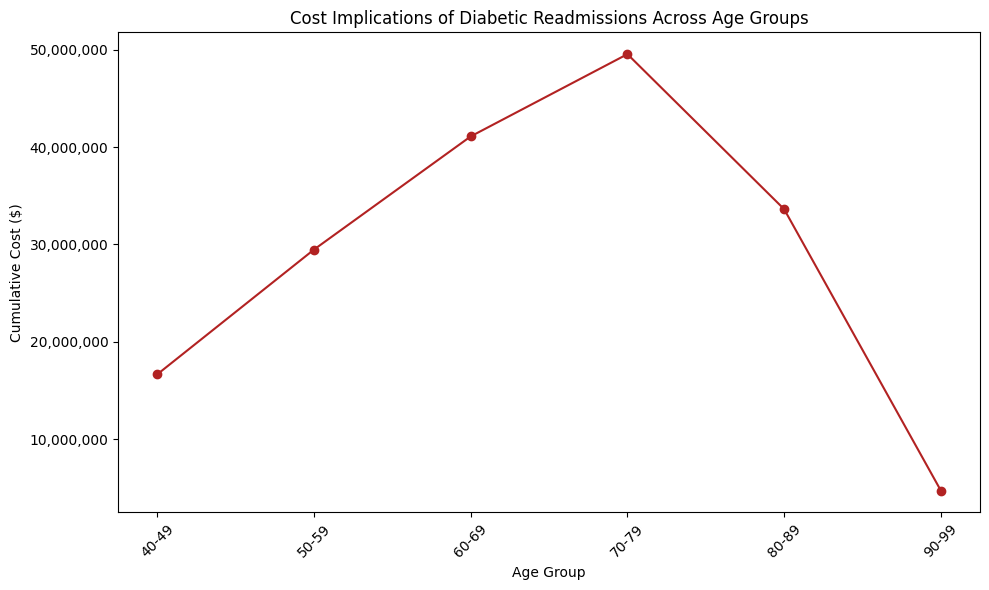

In [ ]:
# Assuming the dataset contains 'cost' or an estimated cost for each readmission
# Creating a simulated 'cost' column for demonstration if cost data is unavailable
readmission['cost'] = np.random.randint(5000, 25000, size=len(readmission))

# Grouping by age group and summing the costs of readmitted patients
cost_implications = readmission[readmission['readmitted'] == 'Yes'].groupby('age')['cost'].sum()

# Plotting a line chart for cost implications across age groups
plt.figure(figsize=(10, 6))
cost_implications.plot(kind='line', marker='o', color='firebrick')
plt.title('Cost Implications of Diabetic Readmissions Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Cumulative Cost ($)')
plt.xticks(rotation=45)

# Set x-tick labels for the age groups
plt.xticks([0, 1, 2, 3, 4, 5], ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

**Question It Solves:** How do the costs of diabetic readmissions vary across different age groups?

**Key Observations:**
1. Cost Increase by Age Group: The cumulative cost increases steadily as the age group progresses from 40–50 to 70–80, peaking at nearly $50,000,000.
2. Cost Decrease in Older Age Groups: After reaching its highest point in the 70–80 age group, the cost declines sharply for the 80–90 and 90–100 age groups.
3. Steep Drop in the Oldest Age Group: The most significant decline occurs in the 90–100 age group, where cumulative costs drop dramatically.

**Healthcare Planning:**

From a healthcare planning perspective, this chart provides insights for resource allocation and cost management:

1. Age-Targeted Interventions: The peak in cumulative costs at the 70–80 age group suggests that healthcare providers may want to focus on improving diabetic care and reducing readmission rates for patients in this age range to alleviate financial strain.
2. Post-Peak Decline: The sharp cost decline in older age groups (80–100) may indicate different care strategies or a reduced focus on aggressive treatments for these patients. Healthcare planners could analyze whether this is due to lower survival rates, changes in treatment protocols, or other factors.
3. Cost Reduction Strategies: Identifying the cost drivers in the 70–80 age group can help design strategies to reduce the overall financial burden. This may involve preventive care, improved diabetes management, or alternative treatment approaches.

####**Chart - 10: Total Expenses vs. Number of Medications**





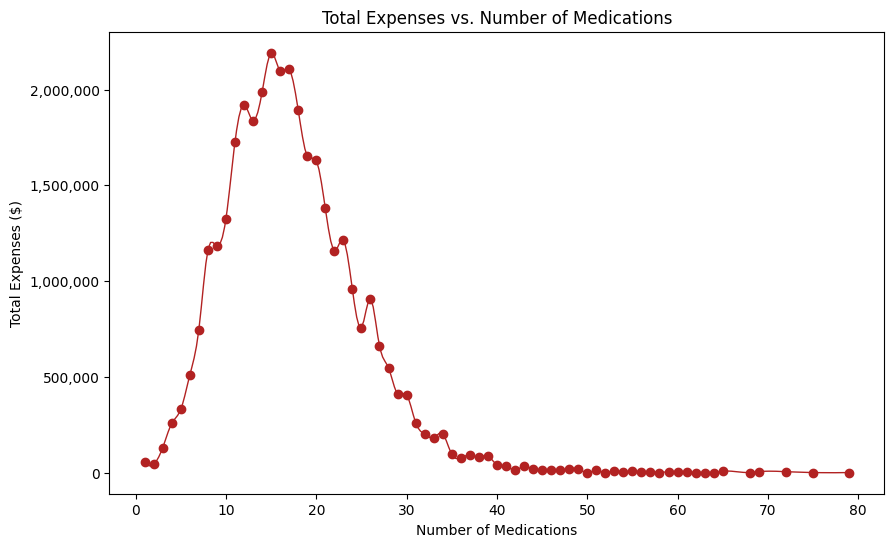

In [ ]:
readmission['total_expenses'] = readmission['n_inpatient'] * 2271

# Group by number of medications and calculate total expenses
expenses_by_medications = readmission.groupby('n_medications').agg(
    total_expenses=('total_expenses', 'sum')
).reset_index()

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(expenses_by_medications['n_medications'], expenses_by_medications['total_expenses'], color='firebrick')

# Creating a smooth line
x = expenses_by_medications['n_medications']
y = expenses_by_medications['total_expenses']
x_new = np.linspace(x.min(), x.max(), 300)  # Create 300 points for smoothness
spl = interp.make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_new = spl(x_new)

# Plot the smooth line
plt.plot(x_new, y_new, color='firebrick', linewidth=1, label='Trend Line')
plt.title('Total Expenses vs. Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Total Expenses ($)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**Question It Solves:** How does the number of medications prescribed to patients influence overall healthcare costs?

**Key Observations:**
1. Expense Trend: Total expenses increase sharply as the number of medications rises from 0 to about 10-15 medications, reaching a peak of around $2,000,000.
2. Peak Expenses: The highest expenses appear when the number of medications is between 10 and 20.
3. Decline: After reaching the peak, total expenses decline significantly as the number of medications continues to increase beyond 20.
4. Low Expenses at Higher Medication Counts: Once the number of medications exceeds approximately 40, total expenses stabilize at much lower levels, with very few outliers as medication counts reach around 70-80.

**Healthcare Planning:**

From a healthcare planning perspective, this graph provides valuable information for optimizing pharmaceutical resource allocation.

It highlights:
1. Cost Efficiency: There may be an optimal range for the number of medications where costs rise steeply but yield the most significant expense impact (around 10–20 medications).
2. Resource Management: For patients with higher medication counts (beyond 40), total costs tend to flatten, suggesting potential inefficiencies in treatment regimens. Healthcare providers can explore alternative strategies for managing complex conditions with a high number of medications without incurring excessive costs.
3. Policy Making: The insights could guide policies that emphasize the moderation of medication use to control costs while ensuring patient outcomes are not compromised.

###**Optimizing Hospital Bed Availability**

####**Chart - 11: Visit Counts by Admission Category who have been Readmitted**





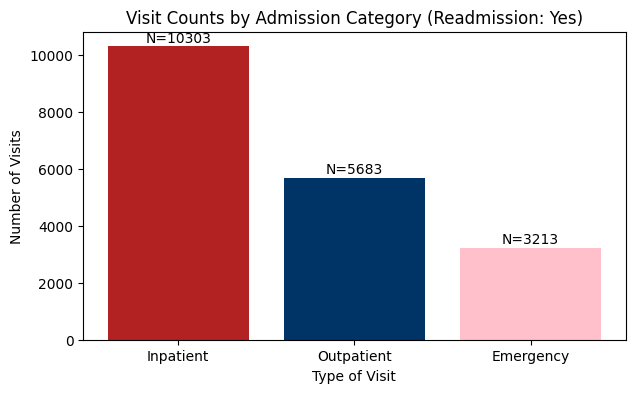

In [ ]:
# Store visit counts in a dictionary
visit_counts = {
    'Inpatient': readmission_group['n_inpatient'].sum(),
    'Outpatient': readmission_group['n_outpatient'].sum(),
    'Emergency': readmission_group['n_emergency'].sum()
}

plt.figure(figsize=(7, 4))
bars = plt.bar(visit_counts.keys(), visit_counts.values(), color=newred_palette)

# Get bar info
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, f'N={int(yval)}', ha='center', va='bottom')

# Finalize and plot
plt.title('Visit Counts by Admission Category (Readmission: Yes)')
plt.xlabel('Type of Visit')
plt.ylabel('Number of Visits')

plt.show()

**Question It Solves:**
How does the frequency of hospital visits (Inpatient, Outpatient, Emergency) relate to patients who were readmitted?

**Key Insights:**
1. Inpatient Visits: The highest count of readmitted patients comes from Inpatient visits, with 10,303 visits. This emphasizes the heavier reliance on inpatient services among patients who were readmitted, which suggests a correlation between the severity of cases (typically treated as inpatients) and higher readmission rates.
2. Outpatient Visits: Outpatient visits had 5,683 readmissions. While fewer than Inpatient cases, outpatient readmissions still represent a significant portion, which might indicate some areas where outpatient care could prevent further readmissions.
3. Emergency Visits: Emergency visits had 3,213 readmissions. While this is the lowest among the three categories, it highlights the critical nature of emergency cases where follow-up readmissions may still occur.

**Hospital Bed Space and Cost Minimization:**

In the broader context of optimizing hospital operations—such as freeing up inpatient beds and minimizing readmission-related costs—the graph suggests that interventions targeting inpatient services may have the greatest impact in reducing overall readmissions, thereby freeing up valuable resources in the hospital system.


####**Chart - 12: Insulin (Diabetes Medication) and Cholesterol vs. Hospital Beds (Inpatient Visits)**





<ipython-input-106-26d910771980>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=readmission, x='cholesterol', y='n_inpatient', hue='diabetes_med', palette=newred_palette)


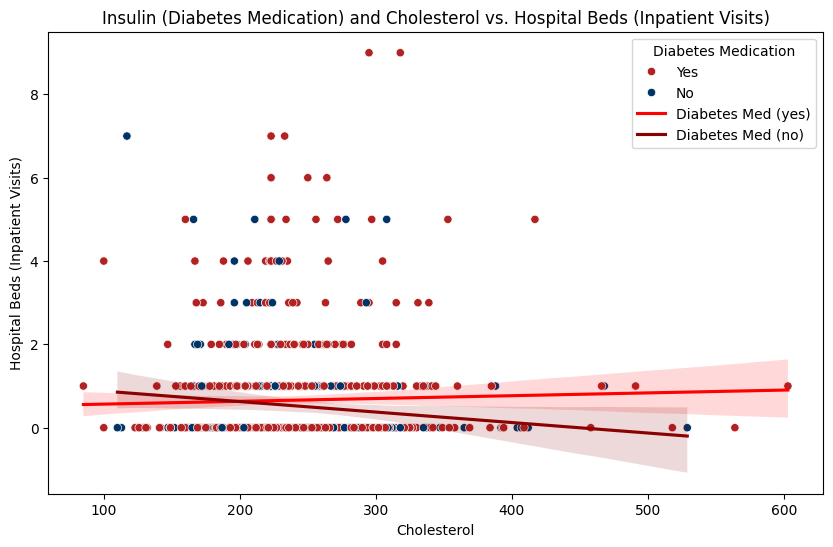

In [ ]:
readmission['cholesterol'] = heart['Cholesterol']

# Plot with diabetes_med as the hue and two trendlines for each category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=readmission, x='cholesterol', y='n_inpatient', hue='diabetes_med', palette=newred_palette)

# Regression
sns.regplot(data=readmission[readmission['diabetes_med'] == 'Yes'],
            x='cholesterol', y='n_inpatient', scatter=False, color='red', label='Diabetes Med (yes)')
sns.regplot(data=readmission[readmission['diabetes_med'] == 'No'],
            x='cholesterol', y='n_inpatient', scatter=False, color='darkred', label='Diabetes Med (no)')

plt.title('Insulin (Diabetes Medication) and Cholesterol vs. Hospital Beds (Inpatient Visits)')
plt.xlabel('Cholesterol')
plt.ylabel('Hospital Beds (Inpatient Visits)')
plt.legend(title='Diabetes Medication')
plt.show()

**Question It Solves:**
How do cholesterol levels and the use of insulin (diabetes medication) impact hospital inpatient visits (measured by the number of hospital beds used)?

**Key Insights:**
1. Cholesterol vs. Hospital Bed Utilization: The x-axis represents cholesterol levels, and the y-axis shows the number of hospital beds (inpatient visits). The scatter plot is divided into two groups: patients who received diabetes medication (darker red points) and those who did not (lighter red points).
2. Medication vs. No Medication: The plot includes two trend lines—one for patients on diabetes medication (solid red line) and one for those not on diabetes medication (lighter red line). These lines help visualize the general trends for both groups. Notably, both lines are relatively flat, indicating that cholesterol levels may have a limited impact on the number of hospital beds used, regardless of medication.
3. Distribution of Hospital Beds: The scatter points reveal a clustering of patients with fewer hospital beds used (typically 0-2) across both groups, suggesting that the majority of patients, regardless of cholesterol levels or diabetes medication use, require relatively fewer inpatient visits. However, there are still scattered cases with higher bed usage (3-8), indicating some patients might have more severe conditions requiring prolonged inpatient care.

**Hospital Bed Space and Cost Minimization:**

From a healthcare resource perspective, this chart provides insights into how diabetes management via medication does not seem to strongly influence the utilization of hospital beds for inpatient care. Both groups display similar trends, meaning that managing cholesterol levels through diabetes medication alone may not necessarily reduce the need for hospital beds, underscoring the complexity of reducing inpatient visits and hospital costs.


####**Chart - 13: Total Expenses by A1C Test Result and Glucose Test Result**



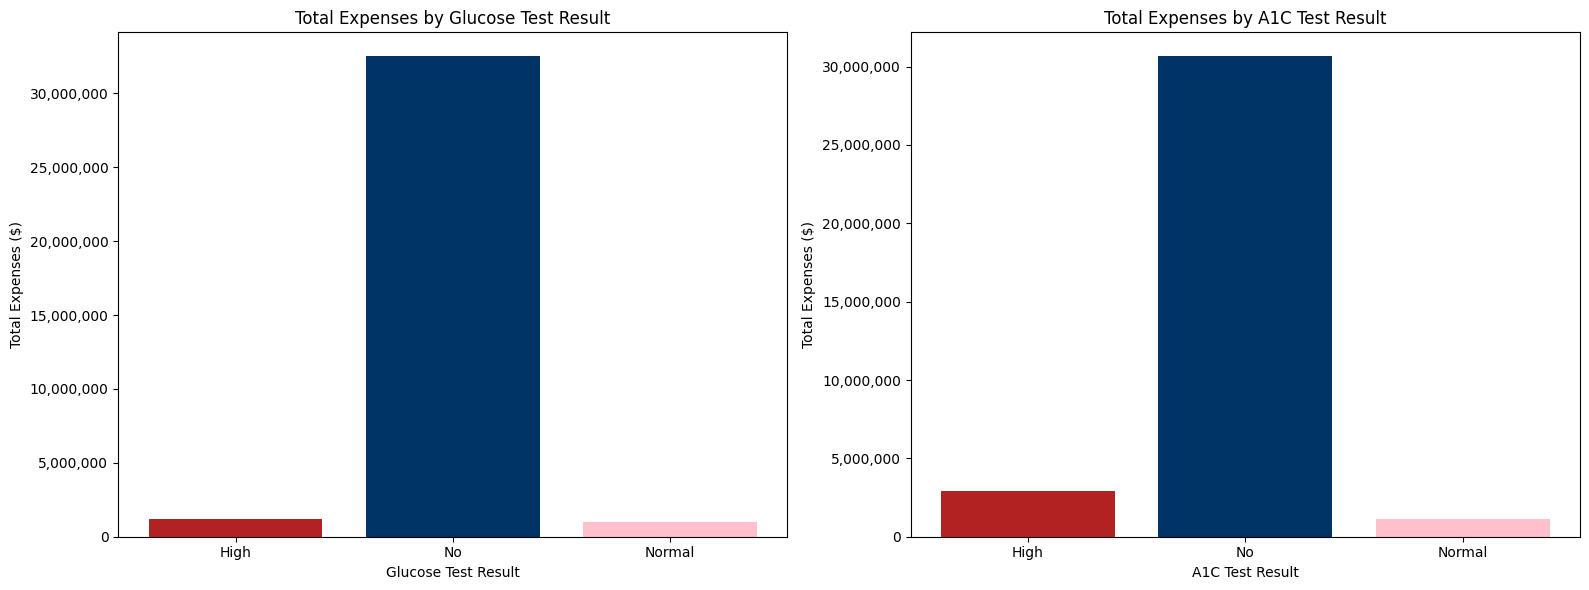

In [ ]:
# Calculate total expenses
readmission['total_expenses'] = readmission['n_inpatient'] * 2271

# Group by glucose test result and calculate total expenses
expenses_by_glucose_test = readmission.groupby('glucose_test').agg(
    total_expenses=('total_expenses', 'sum'),
    count=('age', 'count')
).reset_index()

# Group by A1C test result and calculate total expenses
expenses_by_a1c_test = readmission.groupby('A1Ctest').agg(
    total_expenses=('total_expenses', 'sum'),
    count=('age', 'count')
).reset_index()

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Glucose Test Result
ax1.bar(expenses_by_glucose_test['glucose_test'], expenses_by_glucose_test['total_expenses'], color=newred_palette)
ax1.set_title('Total Expenses by Glucose Test Result')
ax1.set_xlabel('Glucose Test Result')
ax1.set_ylabel('Total Expenses ($)')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['High', 'No', 'Normal'])

# Plot for A1C Test Result
ax2.bar(expenses_by_a1c_test['A1Ctest'], expenses_by_a1c_test['total_expenses'], color=newred_palette)
ax2.set_title('Total Expenses by A1C Test Result')
ax2.set_xlabel('A1C Test Result')
ax2.set_ylabel('Total Expenses ($)')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['High', 'No', 'Normal'])
plt.tight_layout()
plt.show()

**Question It Solves:**
How do glucose and A1C test results impact the total expenses incurred by patients?

**Key insights:**
1. Test Result and Expense Relationship: The side-by-side bar charts display the total expenses incurred by patients, categorized by their glucose and A1C test results (High, Normal, and No test). This allows for a comparison of the financial burden associated with different test outcomes.
2. Expense Distribution: The total expenses are overwhelmingly concentrated in the "No" test result category for both glucose and A1C tests, with relatively smaller expenses for patients with "High" or "Normal" test results.
3. Test Influence on Hospital Costs: The substantial difference in expenses suggests that patients who did not undergo glucose or A1C testing incurred significantly higher costs, which could imply more severe or unmanaged cases requiring higher healthcare spending.
4. Resource Allocation and Cost Minimization: By identifying the connection between test results and total expenses, healthcare providers can explore whether more proactive testing (glucose and A1C) might reduce overall costs by enabling earlier intervention or management of diabetes-related complications.

**Hospital Resource Optimization:**

This analysis could help answer important questions about optimizing hospital resources, potentially reducing readmissions, and lowering overall treatment costs.


####**Chart - 14: Total Expenses by Age Group**





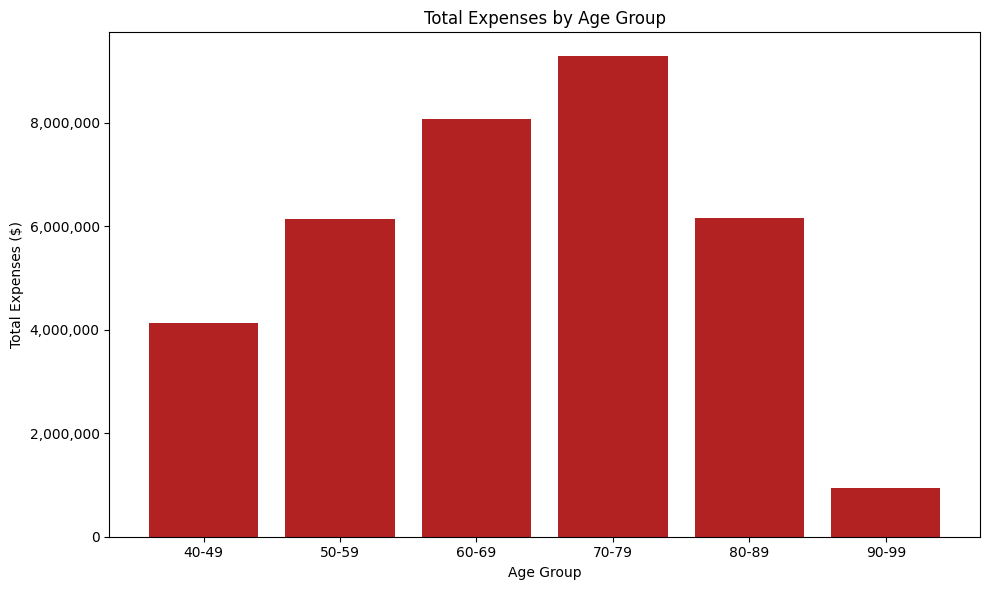

In [ ]:
# Group by age and calculate total expenses (assuming 'age' is already categorized)
expenses_by_age_group = readmission.groupby('age').agg(
    total_expenses=('total_expenses', 'sum')
).reset_index()

# Create the graph with the same formatting
plt.figure(figsize=(10, 6))
bars = plt.bar(expenses_by_age_group['age'], expenses_by_age_group['total_expenses'], color='firebrick')

# Formatting the graph
plt.title('Total Expenses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Expenses ($)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis with commas

# Set x-tick labels for the age groups
plt.xticks([0, 1, 2, 3, 4, 5], ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Question It Solves:**
How do diabetic readmission costs vary across different age groups?

**Key insights:**
1. Age and Cost Relationship: The line chart shows the cumulative cost of diabetic readmissions for different age groups. The data points highlight how total expenses fluctuate as patients' ages increase.
2. Peak Readmission Costs: The graph reveals that the highest readmission costs occur in the age group of 70-80 years, peaking at around $9,000,000. This suggests that this age group likely incurs the highest healthcare burden for diabetic readmissions.
3. Decline in Costs for Older Ages: After the peak in the 70-80 age group, there is a notable decline in cumulative costs for patients aged 80 and above, reaching the lowest point in the 90-100 age group. This trend might suggest decreased hospitalizations or reduced healthcare interventions in these older populations.
4. Strategic Resource Planning: The cost pattern across age groups provides valuable insights for healthcare providers in terms of targeting age-specific interventions and allocating hospital resources effectively. By understanding which age groups drive the highest costs, hospitals can focus on reducing readmissions and managing chronic conditions like diabetes more effectively.

**Reduction of Readmission Costs:**

This analysis can help explore potential ways to reduce readmission costs by focusing on the most affected age groups, ultimately optimizing healthcare resources and hospital bed availability.


####**Chart - 15: Total Expenses, Average Inpatient Days Cost, and Expense Trend by Age**





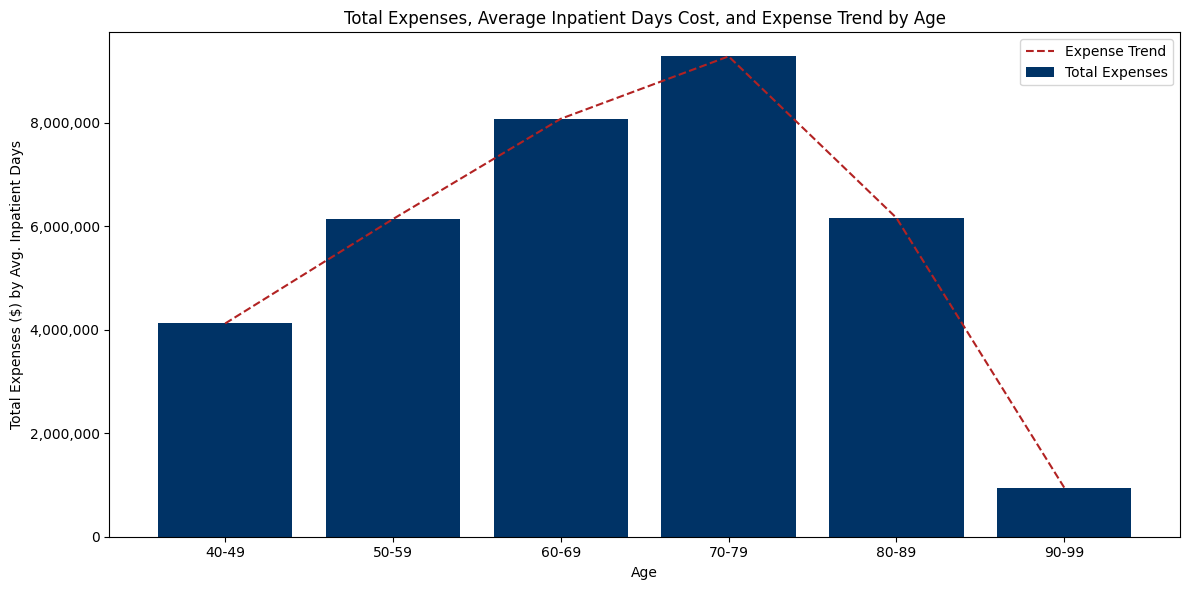

       avg_inpatient_days  total_expenses
count            6.000000    6.000000e+00
mean             0.618223    5.786130e+06
std              0.054895    2.962025e+06
min              0.559572    9.492780e+05
25%              0.603063    4.623756e+06
50%              0.605975    6.147597e+06
75%              0.610823    7.594792e+06
max              0.723285    9.279306e+06


In [ ]:
dark_blue_color = '#003366'

# Calculate total expenses per inpatient day
readmission['total_expenses'] = readmission['n_inpatient'] * 2271

# Group by age and calculate average inpatient days and total expenses
expenses_by_age = readmission.groupby('age').agg(
    avg_inpatient_days=('n_inpatient', 'mean'),
    total_expenses=('total_expenses', 'sum')
).reset_index()

# Create the graph without the secondary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total expenses
bars = ax1.bar(expenses_by_age['age'], expenses_by_age['total_expenses'], color=dark_blue_color, label='Total Expenses')

# Line plot for expense trend using the same axis
line2 = ax1.plot(expenses_by_age['age'], expenses_by_age['total_expenses'], color='firebrick', linestyle='--', label='Expense Trend')

# Set up the primary axis for total expenses and avg inpatient day costs
ax1.set_ylabel('Total Expenses ($) by Avg. Inpatient Days')
ax1.set_xlabel('Age')
ax1.tick_params(axis='y', labelcolor='black')

# Format y-axis with commas
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis with commas

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper right')

plt.title('Total Expenses, Average Inpatient Days Cost, and Expense Trend by Age')

# Set x-tick labels for the age groups
plt.xticks([0, 1, 2, 3, 4, 5], ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.show()

# Print summary statistics
print(expenses_by_age.describe())

**Question It Solves:**
How do total hospital expenses and the average cost per inpatient day vary across different age groups?

**Key Insights:**
1. Total Expenses by Age: The blue bars represent total expenses (in dollars) incurred by each age group. The highest expenses are incurred by individuals aged 70-80, followed by those aged 60-70 and 80-90. These expenses decrease significantly for the oldest group (90-100), as well as for younger age groups (40-50 and 50-60), with the lowest expenses in the 40-50 range.
2. Average Inpatient Days Cost: The yellow line represents the average inpatient day cost (measured on the right y-axis in orange). Interestingly, the average inpatient cost remains fairly consistent across all age groups. This trend suggests that, despite varying total expenses, the per-day cost of hospital stays remains stable, indicating that the variation in total expenses is primarily driven by the volume of hospital stays rather than the cost per stay.
3. Expense Trend (Red Dashed Line): The red dashed line indicates an expense trend across the age groups. The upward slope from ages 40-50 to 70-80 shows increasing expenses, which peak in the 70-80 age group. This could be due to the higher healthcare needs of individuals in this age bracket, such as more frequent hospitalizations or longer stays. After the peak, there is a noticeable decline in total expenses for the 80-90 and 90-100 age groups.

**Healthcare Planning:**

This chart provides valuable information for hospital administrators and healthcare planners to allocate resources and predict budget needs. The steady inpatient day cost combined with the higher total expenses in middle to older age groups indicates that health systems may need to prepare for higher costs as individuals transition into their 60s and 70s, followed by a drop in costs as the population ages further.


## Conclusions

**Analysis Conclusion**

1) According to our data, readmission rates do not vary with age across all age groups, but the number of diabetes patients and their average length of stay in the hospital do. They peak between 70 and 80 years of age. This implies that age has little bearing on the chance of readmission. Thus, better post-discharge care, medication adherence, and better management of co-occurring disorders are key components that should be the focus of healthcare efforts to lower readmission rates and improve patient outcomes effectively.

2) Our data shows that, in contrast to what we initially believed, emergency room visits are not the most common kind of medical visits among patients who have been readmitted. Instead, most are hospitalized as inpatients because they need more extensive care than what emergency rooms can provide. According to this analysis, long-term care plans and inpatient services should be improved to address the underlying medical conditions requiring extended hospital stays to lower readmission rates.

3) The correlation heat map illustrates the numerical factor’s positive impact on patient treatment. Notably, longer hospital stays are linked to more thorough lab work and medical procedures, indicating that the longer a patient stays in the hospital, they get more intensive care. On the other hand, the weaker correlation between outpatient visits and hospital stays shows that having more outpatients results in less time spent in the hospital. This analysis demonstrates the strong correlation between hospitalization patterns of patients, medical procedures, and medication administration. Also, it is important to note that the correlation does not indicate cause all the time, but these trends may help the healthcare providers in identifying areas that require attention to enhance patient outcomes and potentially lower readmission rates.


4) The analysis of chest pain types, sex distribution, and age patterns in heart disease patients reveals significant insights. There is a notable difference in the prevalence of heart disease between males and females across all chest pain types, with males consistently showing higher numbers. ASY (Asymptomatic) is the most common chest pain type for both sexes, followed by NAP (Non-Anginal Pain).

5) Our visualization offers clear insights into the relationship between diabetes medication and hospital readmission rates.The majority of patients in the study are on diabetes medication, as indicated by the taller bars in the "yes" category for diabetes medication. While medication doesn't seem to dramatically reduce readmission rates, it's important to consider that patients on medication might have more severe diabetes, requiring closer monitoring and more frequent hospital visits.

6) The analysis done provided us the insights that overall the age group of 60-80 has the highest expanse in all the catagory (i.e.time, money and medications). Making them the primary taget for our suggeted next steps.

**Next Steps**

1. Focus on post-discharge care:
* Given that readmission rates don't vary significantly with age, but other factors do, it's crucial to improve post-discharge care across all age groups. Some steps could include:
Develop comprehensive discharge planning protocols
Implement medication adherence programs
Create targeted interventions for managing co-occurring disorders
2. Address gender disparities in heart disease:
* Given the higher prevalence of heart disease in males across all chest pain types:
Develop targeted screening programs for early detection in high-risk male populations
Create gender-specific education and prevention programs
Investigate the reasons behind the gender disparity to inform future interventions

3. Refine diabetes management strategies:
* Considering the relationship between diabetes medication and readmission rates:
Conduct a more detailed analysis of diabetes severity among medicated patients
Develop tailored management plans for patients with more severe diabetes to reduce readmission rates
Investigate the effectiveness of current diabetes medications and explore potential alternatives or complementary treatments

4. Data-driven decision making: To build upon these insights:

* Conduct further statistical analyses to validate the observed trends
Collaborate with other healthcare dataset to share best practices and learnings


## Appendix

### References

Centers for Medicare & Medicaid Services (CMS). (2024). Hospital General Information [Dataset]. https://doi.org/10.24432/xubh-q36u.

Clore, J., Cios, K., DeShazo, J., & Strack, B. (2014). Diabetes 130-US Hospitals for Years 1999-2008 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J.

Health Forum, LLC. (2022). 1999 - 2022 AHA Annual Survey [Dataset]. Copyright 2022 by Health Forum, LLC, an affiliate of the American Hospital Association. Special data request, 2023. Available at https://www.ahadata.com/aha-annual-survey-database.

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

### Generative AI Statement

**Tools Used:** Chat GPT (Open AI), Claude AI (anthropic), Grammarly

**Primary Uses:**

- **Cleaning Phase:**
Used to plan cleaning process for a dataset with x categorical columns and x numerical columns
Base code for checks in cleaning process
Last check through uploading data and asking for inconsistencies
Get idea on how to drop a row based on one missing value in a specific column

- **Analysis Phase:**
For the primary analysis of our data. We took assistance from generative AI for the most common correlations.
Also used as an optimizing tool in the predictions made. Particularly on how to combine a few insights in the same graph as only 5 of them are allowed.
Understood a few concepts of data inconsistency and how to deal with them
Helped to understand graphs and create key insights to guide our storyline and presentation.

- **Visualization:**
Used AI for better suggestions for correlations of the given columns chosen.
Used to appropriately measure out the scale of the prediction chart
Best color scheme for the data chosen.For formatting, asked AI on how to better display charts in the output section

- **Error solving:**
Used assistance for error solving in the google collab environment specially with data mounting and session changes
Most common errors we came across were the type values and null values inconsistency which we took help.

- **Proofreading:**
Used assistance to help us write the content needed in the given briefs. To summarize it where needed.

